In [50]:
!git init
!git config --global user.email 'ylgiraldoe@uqvirtual.edu.co'
!git config --global user.name 'Yeicko10'
from getpass import getpass
password = getpass('1094923518Yeicko')


Reinitialized existing Git repository in C:/Users/Usuario1/Desktop/Parcial1/.git/
1094923518Yeicko········


In [51]:
!pip install pandas
!pip install numpy 
!pip install matplotlib

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("search.csv")
df

,Planet_Name,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag,Catalog_Name
0,Kepler-1697 b,0.000,0.000,0.005,0.11,0.00668,526.0,442.0,3.121,33.4969,4.1110,11.2,247.77,4682.0,4.54,True,nexsci
1,CoRoT-10 b,0.000,0.013,0.007,0.97,2.75000,796.0,670.0,3.860,13.2406,2.9800,11.8,338.39,5075.0,4.65,True,nexsci
2,CoRoT-14 b,0.057,0.024,0.001,1.09,7.60000,2317.0,1948.0,4.200,1.5121,1.6620,13.8,1744.60,6035.0,4.35,True,nexsci
3,CoRoT-18 b,0.082,0.062,0.010,1.31,3.47000,1816.0,1527.0,3.700,1.9001,2.3870,13.0,764.89,5440.0,4.40,True,nexsci
4,CoRoT-20 b,0.001,0.009,0.002,0.84,4.30000,1135.0,955.0,4.179,9.2429,2.2248,12.5,844.06,5880.0,4.35,True,nexsci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,TOI-2570 b,0.107,0.108,0.080,1.22,0.82000,1697.0,1427.0,3.137,2.9888,3.0065,10.9,361.86,5771.0,4.38,True,nexsci
3914,TOI-2196 b,0.028,0.012,0.018,0.31,0.08181,2204.0,1854.0,3.316,1.1947,1.5040,10.3,259.95,5634.0,4.42,True,nexsci
3915,TOI-1820 b,0.075,0.087,0.022,1.14,2.30000,1636.0,1376.0,3.642,4.8607,2.9200,9.5,248.50,5734.0,4.24,True,nexsci
3916,TOI-712 d,0.000,0.000,0.049,0.22,0.02100,372.0,313.0,3.028,84.8396,5.7020,8.3,58.62,4622.0,4.65,True,nexsci


In [69]:
df.describe

<bound method NDFrame.describe of         Planet_Name  SNR_Emission_15_micron  SNR_Emission_5_micron  \
0     Kepler-1697 b                   0.000                  0.000   
1        CoRoT-10 b                   0.000                  0.013   
2        CoRoT-14 b                   0.057                  0.024   
3        CoRoT-18 b                   0.082                  0.062   
4        CoRoT-20 b                   0.001                  0.009   
...             ...                     ...                    ...   
3913     TOI-2570 b                   0.107                  0.108   
3914     TOI-2196 b                   0.028                  0.012   
3915     TOI-1820 b                   0.075                  0.087   
3916      TOI-712 d                   0.000                  0.000   
3917   TOI-2193 A b                   0.452                  0.239   

      SNR_Transmission_K_mag    Rp       Mp    Tday     Teq  log10g_p  \
0                      0.005  0.11  0.00668   526.0 

In [25]:
df.head()

,A,AUPPER,ALOWER,UA,AREF,AURL,AR,ARUPPER,ARLOWER,UAR,...,VREF,VURL,VSINI,VSINIUPPER,VSINILOWER,UVSINI,VSINIREF,VSINIURL,KEPID,KDE
0,780.099,130.017,130.017,130.017,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,11.9153,443.805,443.805,443.805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,344.721,675.924,675.924,675.924,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,151.6190,974.724,974.724,974.724,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1
2,13.761,289.705,289.705,289.705,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,318.8960,349.409,349.409,349.409,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1
3,91.351,190.315,190.315,190.315,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,145.8350,218.177,218.177,218.177,...,NaN,NaN,3.0,1.0,1.0,1.0,Hebrard 2014,http://adsabs.harvard.edu/abs/2014A%26A...572A...,NaN,1
4,185.149,881.662,881.662,881.662,Calculated,http://adsabs.harvard.edu/abs/2006ApJ...646..505B,332.5230,10.1006,10.1006,10.1006,...,NaN,NaN,NaN,NaN,NaN,NaN,Morton 2016,http://adsabs.harvard.edu/abs/2016ApJ...822...86M,NaN,1


In [28]:
df.shape

(5747, 314)

In [26]:
type(df)

pandas.core.frame.DataFrame

In [71]:
df.isnull()

,Planet_Name,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag,Catalog_Name
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3914,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3915,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3916,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
dff=df.dropna()
dff

,Planet_Name,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag,Catalog_Name
0,Kepler-1697 b,0.000,0.000,0.005,0.11,0.00668,526.0,442.0,3.121,33.4969,4.1110,11.2,247.77,4682.0,4.54,True,nexsci
1,CoRoT-10 b,0.000,0.013,0.007,0.97,2.75000,796.0,670.0,3.860,13.2406,2.9800,11.8,338.39,5075.0,4.65,True,nexsci
2,CoRoT-14 b,0.057,0.024,0.001,1.09,7.60000,2317.0,1948.0,4.200,1.5121,1.6620,13.8,1744.60,6035.0,4.35,True,nexsci
3,CoRoT-18 b,0.082,0.062,0.010,1.31,3.47000,1816.0,1527.0,3.700,1.9001,2.3870,13.0,764.89,5440.0,4.40,True,nexsci
4,CoRoT-20 b,0.001,0.009,0.002,0.84,4.30000,1135.0,955.0,4.179,9.2429,2.2248,12.5,844.06,5880.0,4.35,True,nexsci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,TOI-2570 b,0.107,0.108,0.080,1.22,0.82000,1697.0,1427.0,3.137,2.9888,3.0065,10.9,361.86,5771.0,4.38,True,nexsci
3914,TOI-2196 b,0.028,0.012,0.018,0.31,0.08181,2204.0,1854.0,3.316,1.1947,1.5040,10.3,259.95,5634.0,4.42,True,nexsci
3915,TOI-1820 b,0.075,0.087,0.022,1.14,2.30000,1636.0,1376.0,3.642,4.8607,2.9200,9.5,248.50,5734.0,4.24,True,nexsci
3916,TOI-712 d,0.000,0.000,0.049,0.22,0.02100,372.0,313.0,3.028,84.8396,5.7020,8.3,58.62,4622.0,4.65,True,nexsci


array([[<AxesSubplot: title={'center': 'SNR_Emission_15_micron'}>,
        <AxesSubplot: title={'center': 'SNR_Emission_5_micron'}>,
        <AxesSubplot: title={'center': 'SNR_Transmission_K_mag'}>,
        <AxesSubplot: title={'center': 'Rp'}>],
       [<AxesSubplot: title={'center': 'Mp'}>,
        <AxesSubplot: title={'center': 'Tday'}>,
        <AxesSubplot: title={'center': 'Teq'}>,
        <AxesSubplot: title={'center': 'log10g_p'}>],
       [<AxesSubplot: title={'center': 'Period'}>,
        <AxesSubplot: title={'center': 'Transit_Duration'}>,
        <AxesSubplot: title={'center': 'K_mag'}>,
        <AxesSubplot: title={'center': 'Distance'}>],
       [<AxesSubplot: title={'center': 'Teff'}>,
        <AxesSubplot: title={'center': 'log10g_s'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

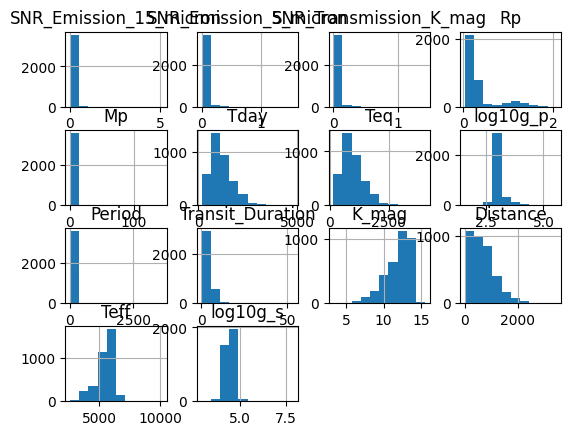

In [75]:
dff.hist()

In [76]:
dff.corr()

C:\Users\Usuario1\AppData\Local\Temp\ipykernel_3204\788259740.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dff.corr()


,SNR_Emission_15_micron,SNR_Emission_5_micron,SNR_Transmission_K_mag,Rp,Mp,Tday,Teq,log10g_p,Period,Transit_Duration,K_mag,Distance,Teff,log10g_s,Transit_Flag
SNR_Emission_15_micron,1.000000,0.830217,0.396235,0.495439,0.070446,0.425620,0.425625,0.089133,-0.047688,-0.041535,-0.270072,-0.136439,0.253160,-0.183706,NaN
SNR_Emission_5_micron,0.830217,1.000000,0.610116,0.666981,0.084585,0.429260,0.429272,0.105798,-0.071016,-0.076001,-0.383022,-0.220954,0.205483,-0.188663,NaN
SNR_Transmission_K_mag,0.396235,0.610116,1.000000,0.491850,-0.008887,0.192440,0.192440,-0.183991,-0.061976,-0.063823,-0.500625,-0.305853,-0.018472,-0.075204,NaN
Rp,0.495439,0.666981,0.491850,1.000000,0.222528,0.426478,0.426477,0.151311,0.009988,0.056005,-0.285279,-0.126442,0.275355,-0.345170,NaN
Mp,0.070446,0.084585,-0.008887,0.222528,1.000000,0.117004,0.117002,0.428535,0.020522,0.015933,-0.005755,0.038809,0.086023,-0.062701,NaN
Tday,0.425620,0.429260,0.192440,0.426478,0.117004,1.000000,1.000000,0.118847,-0.284717,-0.312498,-0.190521,0.017711,0.458864,-0.456614,NaN
Teq,0.425625,0.429272,0.192440,0.426477,0.117002,1.000000,1.000000,0.118840,-0.284732,-0.312486,-0.190522,0.017717,0.458868,-0.456616,NaN
log10g_p,0.089133,0.105798,-0.183991,0.151311,0.428535,0.118847,0.118840,1.000000,0.029846,-0.040247,-0.109491,-0.092802,0.013767,0.011363,NaN
Period,-0.047688,-0.071016,-0.061976,0.009988,0.020522,-0.284717,-0.284732,0.029846,1.000000,0.625706,0.053858,0.063568,0.024458,-0.068125,NaN
Transit_Duration,-0.041535,-0.076001,-0.063823,0.056005,0.015933,-0.312498,-0.312486,-0.040247,0.625706,1.000000,0.093688,0.319074,0.322074,-0.397895,NaN


In [77]:
dff['Rp'].corr(dff['Period'])

0.009987685681618277